In [ ]:
import pandas as pd

# Load dataset
file_path = "Ground water.csv"
df = pd.read_csv(file_path)

# Display first five rows
print("First five rows of the dataset:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


First five rows of the dataset:
         pH          TDS    Hardness   Chlorides   Nitrates    Sulfates  \
0  6.927022   348.675999  333.398813  331.744694  40.320170  162.193351   
1  8.485345   312.099394  422.297711  104.730823  35.811433  140.782163   
2  7.902202  1106.290211  389.039702  422.803018   2.656876  140.594038   
3  7.413026   415.968478  142.456757  280.329816  45.760180  289.915565   
4  6.409404   374.670491   93.166004  147.682043  28.235229  256.192169   

   Conductivity  Potable  
0   1024.746304        0  
1    132.576461        1  
2    516.037800        0  
3   1098.859877        1  
4    881.238160        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pH            1742 non-null   float64
 1   TDS           1742 non-null   float64
 2   Hardness      1742 non-null   float64
 3   Chlorid

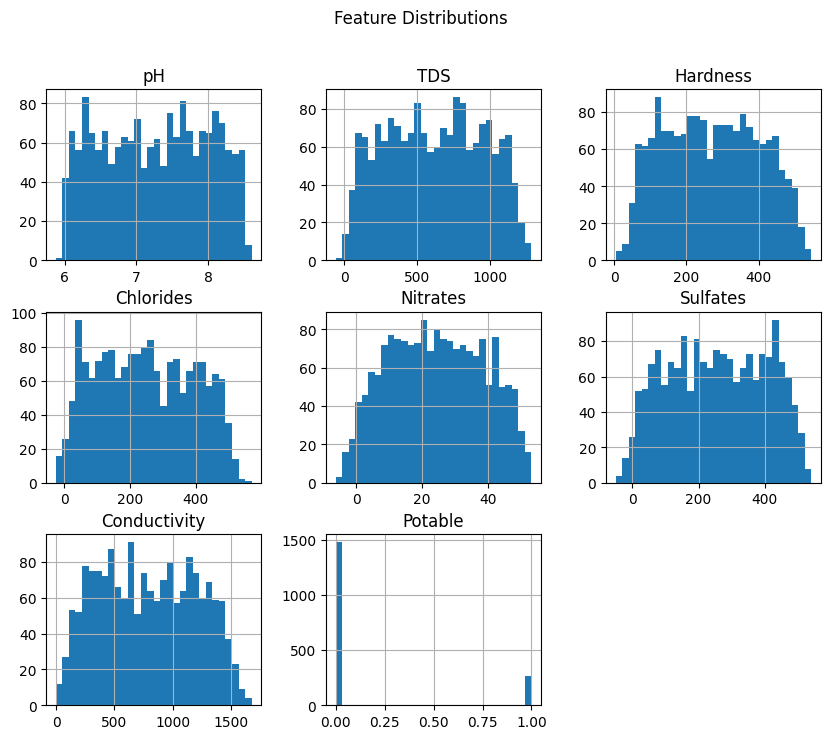

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distribution of each numerical feature
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


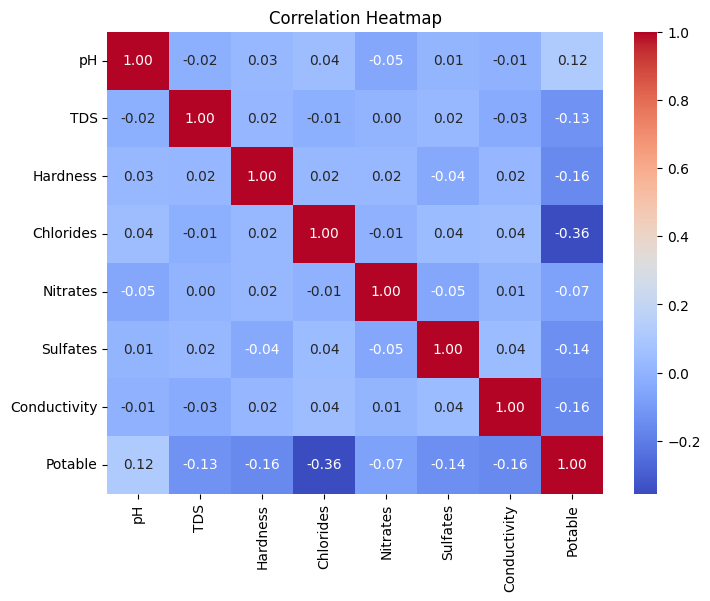

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop(columns=['Potable'])  # Assuming 'Potable' is the target column
y = df['Potable']

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features:")
print(X_scaled_df.head())



Scaled Features:
         pH       TDS  Hardness  Chlorides  Nitrates  Sulfates  Conductivity
0  0.384447  0.303432  0.607622   0.600173  0.781557  0.360157      0.611487
1  0.954557  0.276283  0.771467   0.218749  0.705805  0.323919      0.080409
2  0.741215  0.865770  0.710171   0.753168  0.148763  0.323601      0.308670
3  0.562251  0.353379  0.255706   0.513787  0.872957  0.576324      0.655604
4  0.195078  0.322726  0.164861   0.290915  0.578514  0.519248      0.526061



Class Distribution:
Potable
0    1480
1     262
Name: count, dtype: int64


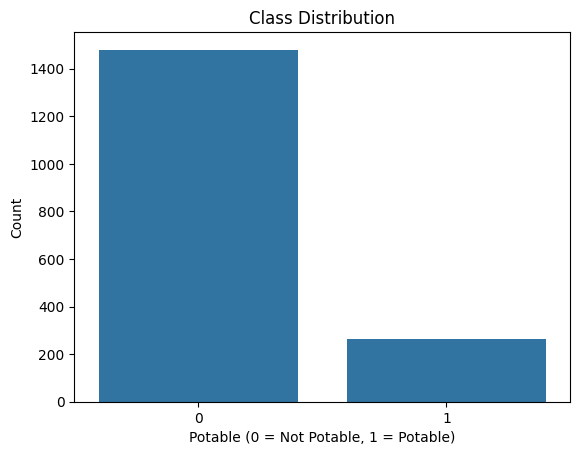

In [ ]:
# Count the number of samples in each class
print("\nClass Distribution:")
print(df['Potable'].value_counts())

# Visualize class distribution
sns.countplot(x=df['Potable'])
plt.title("Class Distribution")
plt.xlabel("Potable (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()


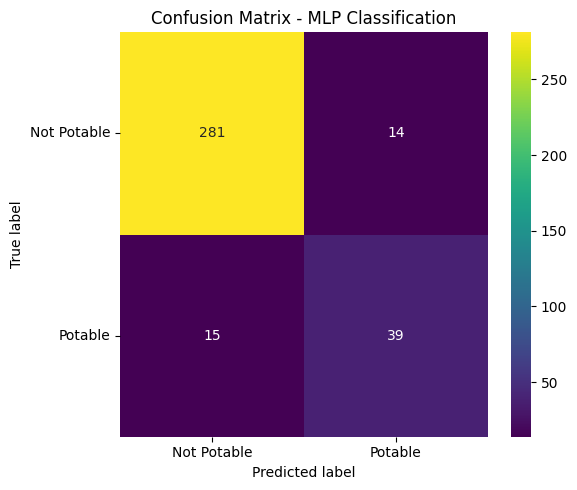

/tmp/ipython-input-361534195.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette="Set2")


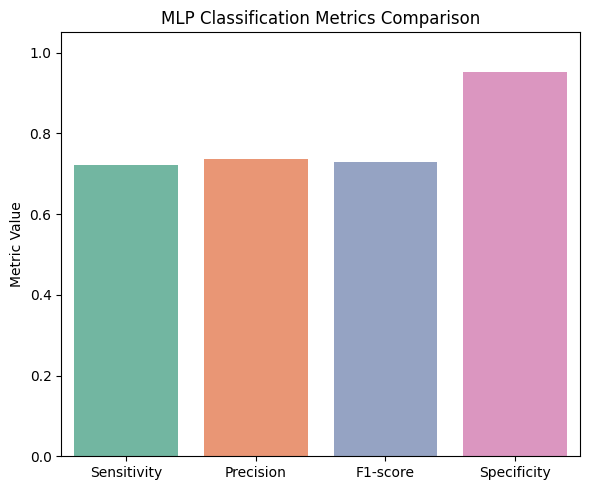

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       295
           1       0.74      0.72      0.73        54

    accuracy                           0.92       349
   macro avg       0.84      0.84      0.84       349
weighted avg       0.92      0.92      0.92       349



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Custom metrics calculation
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title("Confusion Matrix - MLP Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"], rotation=0)
plt.tight_layout()
plt.show()

# Metrics comparison bar plot
plt.figure(figsize=(6, 5))
metrics = [sensitivity, precision, f1, specificity]
labels = ['Sensitivity', 'Precision', 'F1-score', 'Specificity']
sns.barplot(x=labels, y=metrics, palette="Set2")
plt.ylim(0, 1.05)
plt.title("MLP Classification Metrics Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.show()

# Print classification report
print("MLP Classification Report:")
print(classification_report(y_test, y_pred))

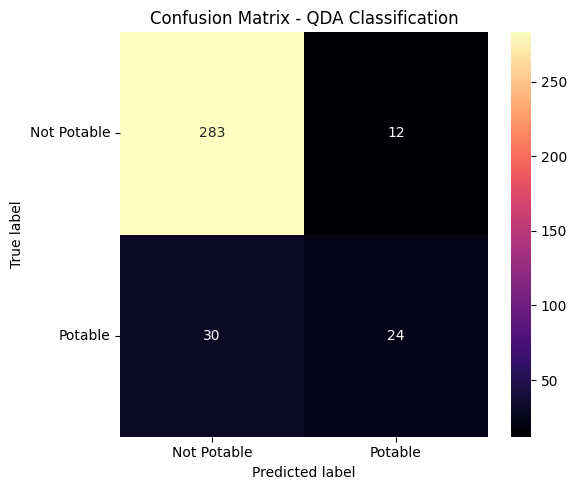

/tmp/ipython-input-3593114467.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette="coolwarm")


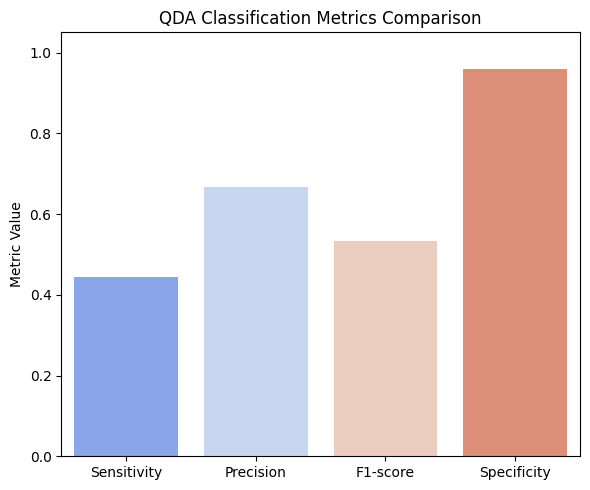

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       295
           1       0.67      0.44      0.53        54

    accuracy                           0.88       349
   macro avg       0.79      0.70      0.73       349
weighted avg       0.87      0.88      0.87       349

Accuracy: 0.88
Precision: 0.67
F1 Score: 0.53
AUC: 0.93


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predictions
y_pred = qda.predict(X_test)
y_prob = qda.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Custom metric calculations
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=True)
plt.title("Confusion Matrix - QDA Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"], rotation=0)
plt.tight_layout()
plt.show()

# Metrics comparison bar plot
plt.figure(figsize=(6, 5))
metrics = [sensitivity, precision, f1, specificity]
labels = ['Sensitivity', 'Precision', 'F1-score', 'Specificity']
sns.barplot(x=labels, y=metrics, palette="coolwarm")
plt.ylim(0, 1.05)
plt.title("QDA Classification Metrics Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.show()

# Print classification report
print("QDA Classification Report:")
print(classification_report(y_test, y_pred))

# Custom metric summary
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y catboost
!pip install numpy==1.23.5
!pip install catboost==1.2


Found existing installation: catboost 1.2.8
Uninstalling catboost-1.2.8:
  Successfully uninstalled catboost-1.2.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 40.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 MB 9.1 MB/s eta 0:00:00


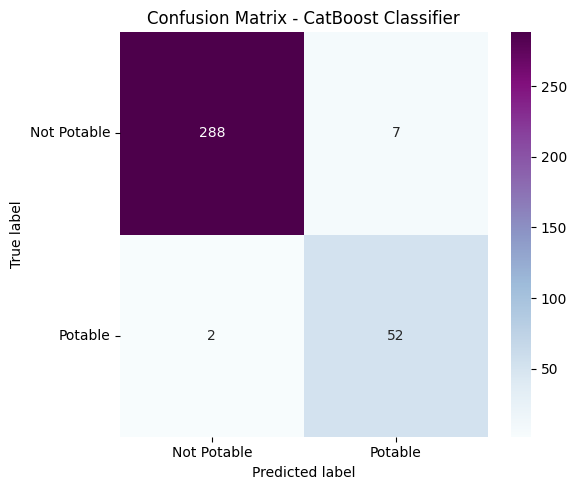

<ipython-input-10-8c521d837fdb>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette="cool")


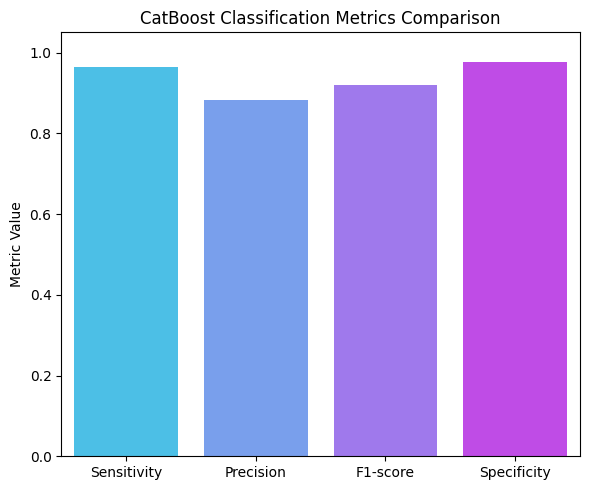

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       295
           1       0.88      0.96      0.92        54

    accuracy                           0.97       349
   macro avg       0.94      0.97      0.95       349
weighted avg       0.98      0.97      0.97       349

Accuracy: 0.97
Precision: 0.88
F1 Score: 0.92
AUC: 0.99


In [ ]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from catboost import CatBoostClassifier

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train CatBoost model
cat = CatBoostClassifier(verbose=0, random_seed=42)
cat.fit(X_train, y_train)

# Predict
y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Custom metrics
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"], rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of key metrics
plt.figure(figsize=(6, 5))
metrics = [sensitivity, precision, f1, specificity]
labels = ['Sensitivity', 'Precision', 'F1-score', 'Specificity']
sns.barplot(x=labels, y=metrics, palette="cool")
plt.ylim(0, 1.05)
plt.title("CatBoost Classification Metrics Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.show()

# Print classification report
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Summary
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


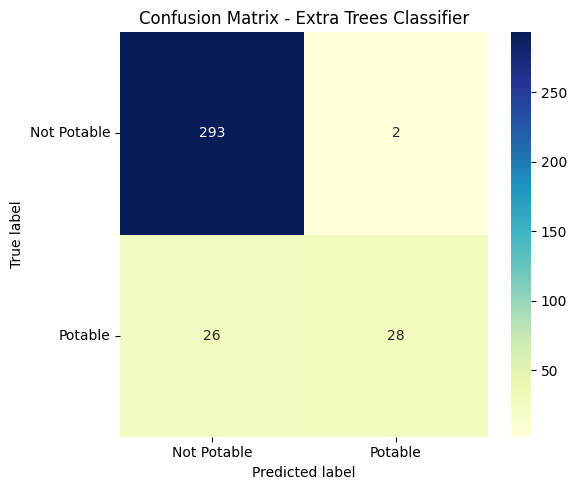

<ipython-input-11-69f5ceff74cb>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics_et, palette="coolwarm")


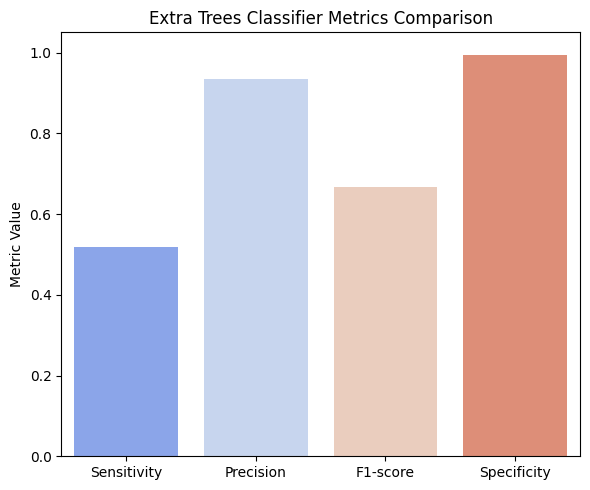

Extra Trees Classifier Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       295
           1       0.93      0.52      0.67        54

    accuracy                           0.92       349
   macro avg       0.93      0.76      0.81       349
weighted avg       0.92      0.92      0.91       349

Accuracy: 0.92
Precision: 0.93
F1 Score: 0.67
AUC: 0.98


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=150, random_state=42)
et_model.fit(X_train, y_train)

# Predictions
y_pred_et = et_model.predict(X_test)
y_prob_et = et_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_et = confusion_matrix(y_test, y_pred_et)
tn, fp, fn, tp = cm_et.ravel()

# Metrics
sensitivity_et = tp / (tp + fn)
precision_et = tp / (tp + fp)
f1_et = 2 * (precision_et * sensitivity_et) / (precision_et + sensitivity_et)
specificity_et = tn / (tn + fp)
accuracy_et = accuracy_score(y_test, y_pred_et)
auc_et = roc_auc_score(y_test, y_prob_et)

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_et, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"], rotation=0)
plt.tight_layout()
plt.show()

# Metric Comparison Plot
plt.figure(figsize=(6, 5))
metrics_et = [sensitivity_et, precision_et, f1_et, specificity_et]
labels = ['Sensitivity', 'Precision', 'F1-score', 'Specificity']
sns.barplot(x=labels, y=metrics_et, palette="coolwarm")
plt.ylim(0, 1.05)
plt.title("Extra Trees Classifier Metrics Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.show()

# Classification Report
print("Extra Trees Classifier Report:")
print(classification_report(y_test, y_pred_et))

# Final Summary
print(f"Accuracy: {accuracy_et:.2f}")
print(f"Precision: {precision_et:.2f}")
print(f"F1 Score: {f1_et:.2f}")
print(f"AUC: {auc_et:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


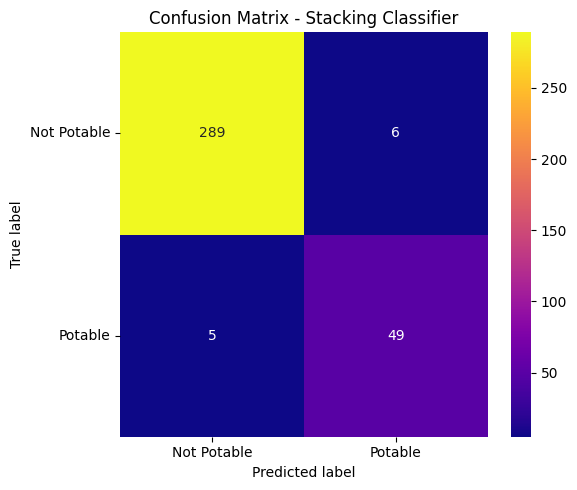

<ipython-input-12-6096e72c7498>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics_stack, palette="rocket")


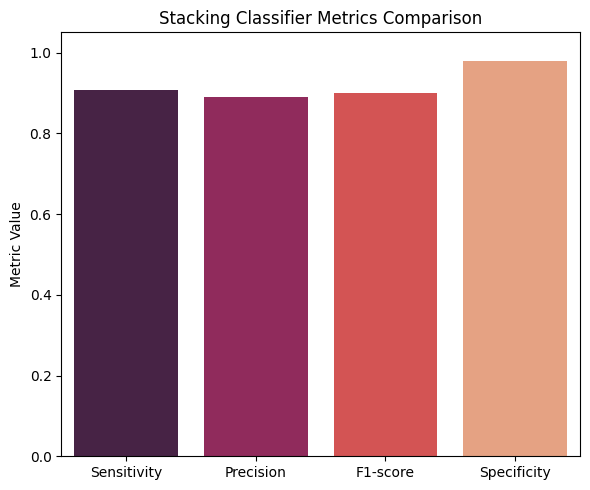

Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       295
           1       0.89      0.91      0.90        54

    accuracy                           0.97       349
   macro avg       0.94      0.94      0.94       349
weighted avg       0.97      0.97      0.97       349

Accuracy: 0.97
Precision: 0.89
F1 Score: 0.90
AUC: 0.99


In [ ]:

from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier

base_learners = [
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42)),
    ('extra', ExtraTreesClassifier(n_estimators=150, random_state=42))
]

meta_model = LogisticRegression()

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)

stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]

cm_stack = confusion_matrix(y_test, y_pred_stack)
tn, fp, fn, tp = cm_stack.ravel()

sensitivity_stack = tp / (tp + fn)
precision_stack = tp / (tp + fp)
f1_stack = 2 * (precision_stack * sensitivity_stack) / (precision_stack + sensitivity_stack)
specificity_stack = tn / (tn + fp)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_prob_stack)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='plasma')
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Potable", "Potable"], rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
metrics_stack = [sensitivity_stack, precision_stack, f1_stack, specificity_stack]
labels = ['Sensitivity', 'Precision', 'F1-score', 'Specificity']
sns.barplot(x=labels, y=metrics_stack, palette="rocket")
plt.ylim(0, 1.05)
plt.title("Stacking Classifier Metrics Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.show()

print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred_stack))

print(f"Accuracy: {accuracy_stack:.2f}")
print(f"Precision: {precision_stack:.2f}")
print(f"F1 Score: {f1_stack:.2f}")
print(f"AUC: {auc_stack:.2f}")


In [ ]:
import joblib

# Save the stacking classifier model to a file
joblib.dump(stack_model, 'stacking_model.pkl')
print("✅ Stacking model saved successfully.")


✅ Stacking model saved successfully.


In [ ]:
# Load the saved stacking classifier model
stack_model = joblib.load('stacking_model.pkl')


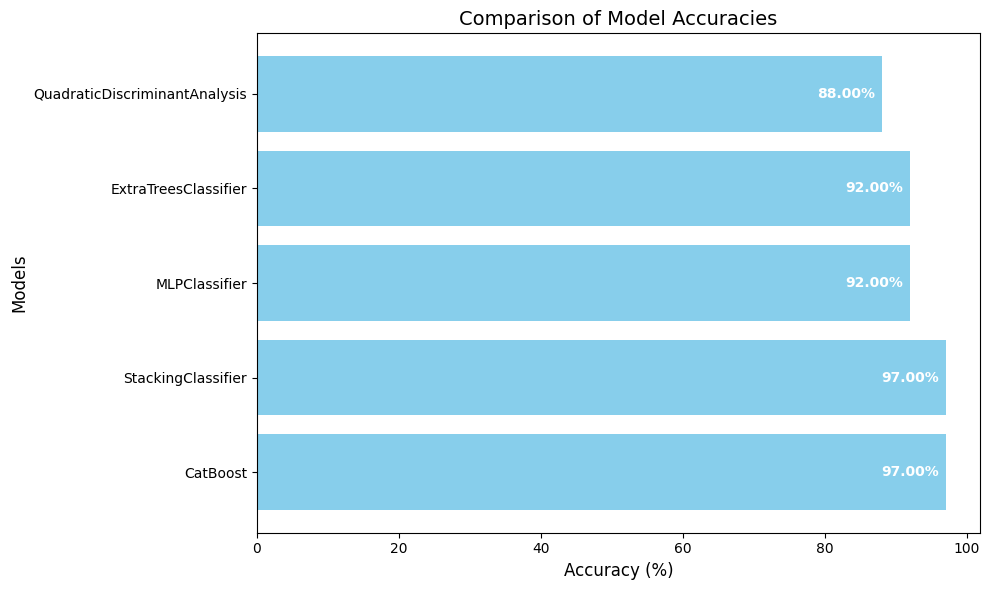

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these accuracies with your actual results
accuracy_scores = {
    "MLPClassifier": 92.00,
    "QuadraticDiscriminantAnalysis": 88.00,
    "CatBoost": 97.00,
    "ExtraTreesClassifier": 92.00,
    "StackingClassifier": 97.00,
}

# Sort the accuracy scores by value
sorted_accuracies = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Extract model names and accuracy values
models = list(sorted_accuracies.keys())
accuracies = list(sorted_accuracies.values())

# Plotting the comparison chart
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='skyblue')

# Annotating the bars with their accuracy values
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', ha='center', color='white', weight='bold')

# Title and labels
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Models", fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install twilio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from twilio.rest import Client

# Load and prepare data
df = pd.read_csv("Ground water.csv")
X = df.drop("Potable", axis=1)
y = df["Potable"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# ✅ New sample with safe values to trigger "Potable"
new_sample = pd.DataFrame([{
    'pH': 7.2,
    'TDS': 250,
    'Hardness': 120,
    'Chlorides': 100,
    'Nitrates': 100,
    'Sulfates': 180,
    'Conductivity': 200
}])

# Scale input sample
new_sample_scaled = scaler.transform(new_sample)

# Predict
prediction = model.predict(new_sample_scaled)[0]
result_text = "SAFE to drink (Potable)" if prediction == 1 else "NOT SAFE to drink (Non-Potable)"

# ✅ Twilio Setup
account_sid = 'ACeaf512b53e80b7064b2a47f720c219d2'
auth_token = '625dbe6498e2f520a343e3775eb25a84'
twilio_number = '+17077213030'
recipient_number = '+919579546604'

client = Client(account_sid, auth_token)

# Send SMS
message = client.messages.create(
    body=f"Water Quality Alert 🚰: The water is {result_text}.",
    from_=twilio_number,
    to=recipient_number
)

print("✅ SMS sent successfully. SID:", message.sid)


✅ SMS sent successfully. SID: SM27bcca06efb9b568b990f47c33f6cfef


In [ ]:
!pip install streamlit pyngrok pandas numpy scikit-learn joblib catboost
!ngrok config add-authtoken 2vihNEBZWz1aJWIV7XqGpT2guKY_5jMyFcHWzuggEezxftARG


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile App.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from pyngrok import ngrok

# Load model and scaler
model = joblib.load("stacking_model.pkl")
scaler = StandardScaler()

# UI title
st.title("💧 Groundwater Potability Prediction App")
st.markdown("Enter the chemical properties of the water sample below:")

# Input fields
ph = st.number_input("pH", min_value=0.0, max_value=14.0, value=7.0)
tds = st.number_input("Total Dissolved Solids (TDS)", min_value=0.0, max_value=2000.0, value=250.0)
hardness = st.number_input("Hardness", min_value=0.0, max_value=500.0, value=120.0)
chlorides = st.number_input("Chlorides", min_value=0.0, max_value=600.0, value=100.0)
nitrates = st.number_input("Nitrates", min_value=0.0, max_value=120.0, value=100.0)
sulfates = st.number_input("Sulfates", min_value=0.0, max_value=600.0, value=180.0)
conductivity = st.number_input("Conductivity", min_value=0.0, max_value=1000.0, value=200.0)

if st.button("Predict Potability"):
    # Create DataFrame
    input_data = pd.DataFrame([{
        'pH': ph,
        'TDS': tds,
        'Hardness': hardness,
        'Chlorides': chlorides,
        'Nitrates': nitrates,
        'Sulfates': sulfates,
        'Conductivity': conductivity
    }])

    # Fit scaler to training-like data
    # Load dataset to fit scaler (optional)
    df = pd.read_csv("Ground water.csv")
    X = df.drop("Potable", axis=1)
    scaler.fit(X)

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict
    prediction = model.predict(input_scaled)[0]

    # Result
    if prediction == 1:
        st.success("✅ The water is SAFE to drink (Potable).")
    else:
        st.error("❌ The water is NOT SAFE to drink (Non-Potable).")


Writing App.py


In [ ]:
from pyngrok import ngrok

# Start the tunnel
public_url = ngrok.connect(8501)
print(f"🌍 Public URL: {public_url}")

# Launch Streamlit app
!streamlit run App.py


🌍 Public URL: NgrokTunnel: "https://c42a-34-148-145-116.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.145.116:8501

2025-05-29 07:54:16.515 Session with id 25b4f911-d28c-4894-8472-ef24612cc185 is already connected! Connecting to a new session.
2025-05-29 09:29:13.171 Session with id 6a122d1c-251a-4fbd-84f6-410dc60e8fb2 is already connected! Connecting to a new session.
